In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# Funksjon for å laste inn og filtrere data basert på dybde
def load_and_filter_data(base_directories, depths):
    all_data = {depth: [] for depth in depths}
    
    # Base directories tar inn mappene som man ønsker å gå igjennom
    for base_directory in base_directories:
        # Tar in hver fil i den gitte mappa
        for file in os.listdir(base_directory):
            # Tar bare filene som er csv filer og leser de om til et dataset
            if file.endswith('.csv'):
                file_path = os.path.join(base_directory, file)
                data = pd.read_csv(file_path)
                # For hvert dyp som er øsnket legger man så inn dybden i dataramma
                for depth in depths:
                    filtered_data = data[data['DEPTH'] == depth]
                    all_data[depth].append(filtered_data)
    
    # Slå sammen dataene for hver dybde fra alle månedene
    for depth in depths:
        all_data[depth] = pd.concat(all_data[depth], ignore_index=True)
    
    return all_data

In [4]:
base_directories = [
    '/home/sagjo8396/NorEMSO/example_notebooks/StaM_Dep1_files',
    '/home/sagjo8396/NorEMSO/example_notebooks/StaM_Dep2_files',
    '/home/sagjo8396/NorEMSO/example_notebooks/StaM_Dep3_files'
]

In [5]:
# Dyp av interesse
depths = [500, 800, 1000, 1200, 2000]

# Laste inn og filtrere data
filtered_data = load_and_filter_data(base_directories, depths)

In [6]:
data_500m = filtered_data[500]
data_800m = filtered_data[800]
data_1000m = filtered_data[1000]
data_1200m = filtered_data[1200]
data_2000m = filtered_data[2000]

In [7]:
def apply_qc_filter(data, qc_column, value_column, qc_min=0, qc_max=3):
    return np.where((data[qc_column] > qc_min) & (data[qc_column] < qc_max), data[value_column], np.nan)

data_500m["PSAL_FILTER"] = apply_qc_filter(data_500m, "PSAL_QC", "PSAL",qc_min=0, qc_max=3)
data_500m["TEMP_FILTER"] = apply_qc_filter(data_500m, "TEMP_QC", "TEMP",qc_min=0, qc_max=3)
data_800m["PSAL_FILTER"] = apply_qc_filter(data_800m, "PSAL_QC", "PSAL",qc_min=0, qc_max=3)
data_800m["TEMP_FILTER"] = apply_qc_filter(data_800m, "TEMP_QC", "TEMP",qc_min=0, qc_max=3)
data_1000m["PSAL_FILTER"] = apply_qc_filter(data_1000m, "PSAL_QC", "PSAL",qc_min=0, qc_max=3)
data_1000m["TEMP_FILTER"] = apply_qc_filter(data_1000m, "TEMP_QC", "TEMP",qc_min=0, qc_max=3)
data_1200m["PSAL_FILTER"] = apply_qc_filter(data_1200m, "PSAL_QC", "PSAL",qc_min=0, qc_max=3)
data_1200m["TEMP_FILTER"] = apply_qc_filter(data_1200m, "TEMP_QC", "TEMP",qc_min=0, qc_max=3)
data_2000m["PSAL_FILTER"] = apply_qc_filter(data_2000m, "PSAL_QC", "PSAL",qc_min=0, qc_max=3)
data_2000m["TEMP_FILTER"] = apply_qc_filter(data_2000m, "TEMP_QC", "TEMP",qc_min=0, qc_max=3)

In [8]:
# Konverter tidspunktene til datetime-objekter og sorter dataene kronologisk
data_500m["TIME"] = pd.to_datetime(data_500m["TIME"])
data_500m = data_500m.sort_values(by="TIME")

data_800m["TIME"] = pd.to_datetime(data_800m["TIME"])
data_800m = data_800m.sort_values(by="TIME")

data_1000m["TIME"] = pd.to_datetime(data_1000m["TIME"])
data_1000m = data_1000m.sort_values(by="TIME")

data_1200m["TIME"] = pd.to_datetime(data_1200m["TIME"])
data_1200m = data_1200m.sort_values(by="TIME")

data_2000m["TIME"] = pd.to_datetime(data_2000m["TIME"])
data_2000m = data_2000m.sort_values(by="TIME")

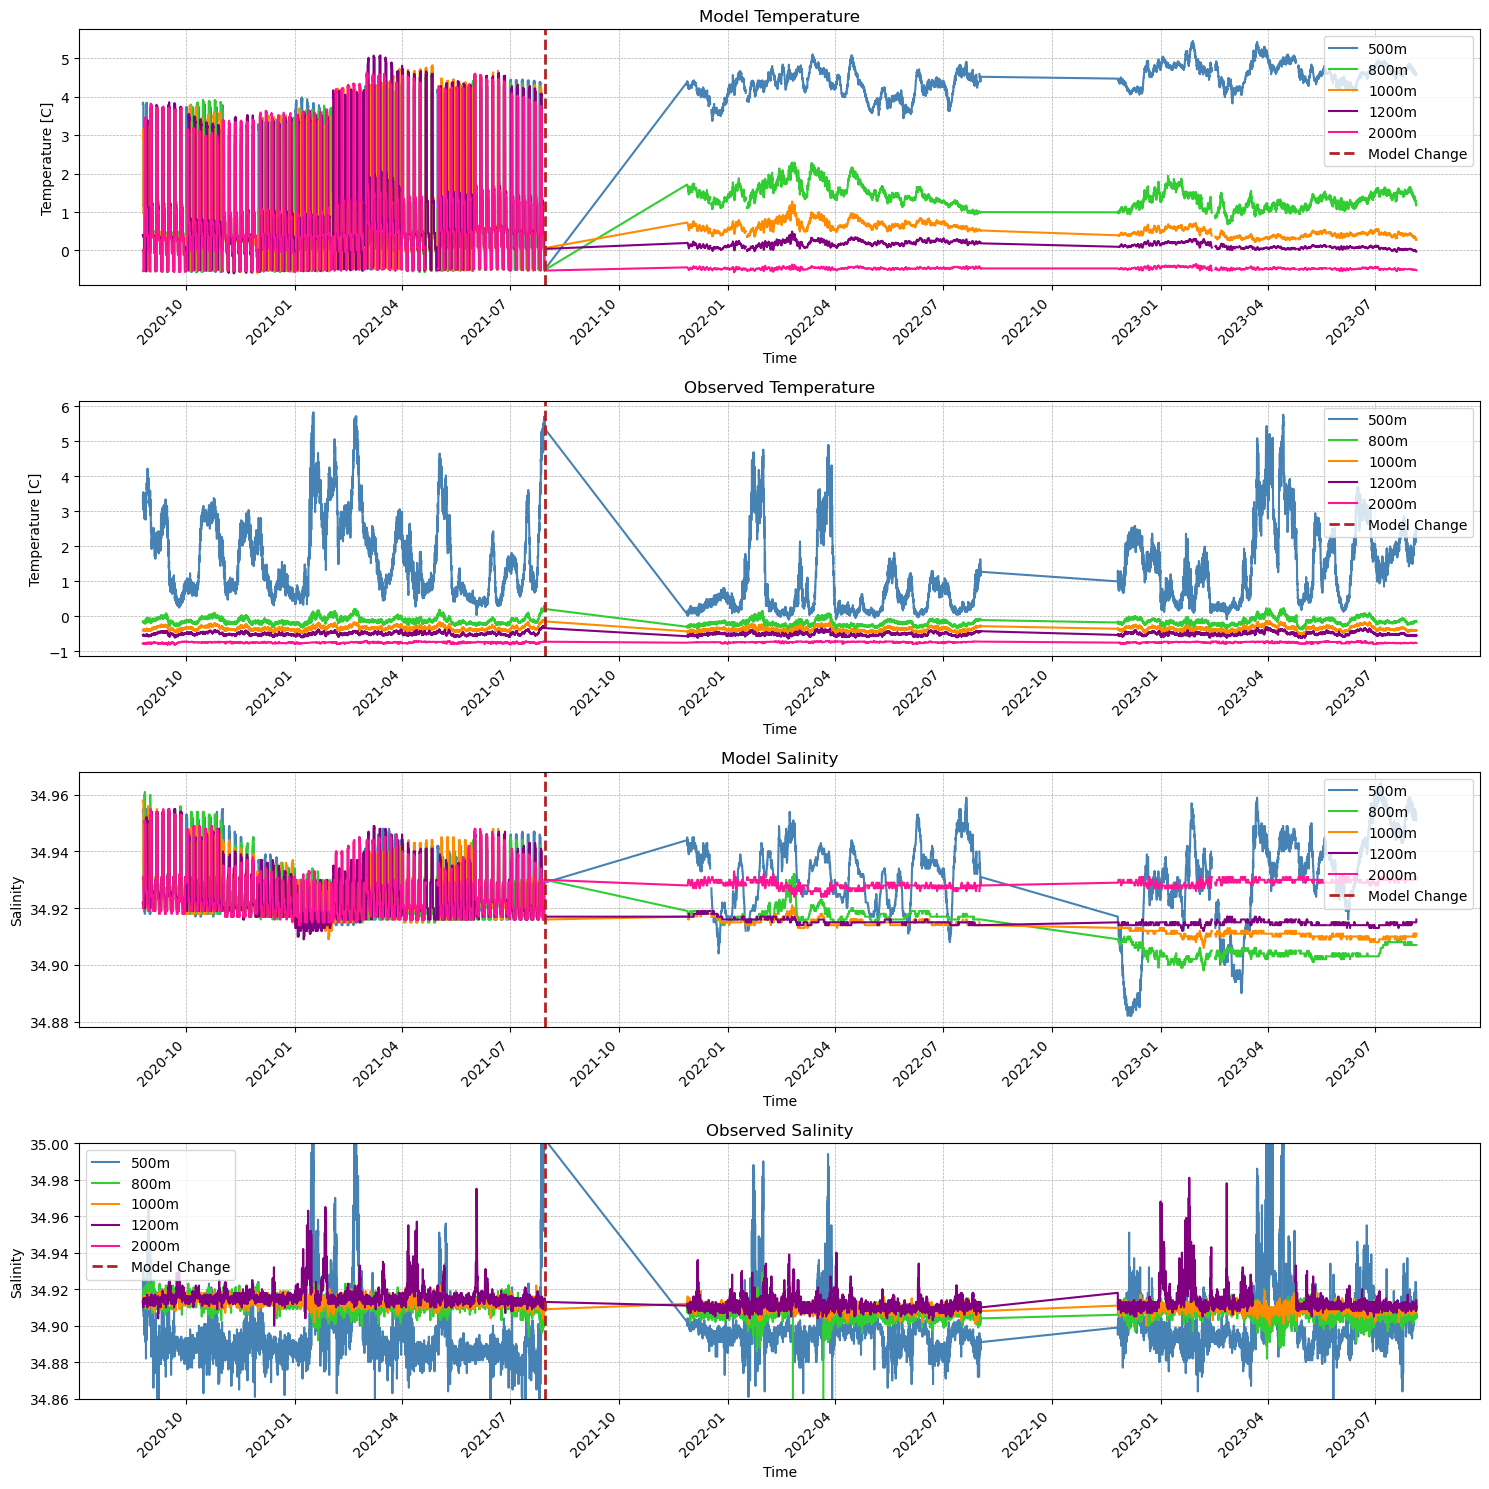

In [9]:

# Bruk tidspunktene fra data_500m for x-aksen (antas å være lik for alle dybder)
time_data = data_500m["TIME"]

# Opprett plottet
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))

# Temperatur modell
axs[0].plot(time_data, data_500m["TEMP_MOD"], label="500m", color='SteelBlue')
axs[0].plot(time_data, data_800m["TEMP_MOD"], label="800m", color='LimeGreen')
axs[0].plot(time_data, data_1000m["TEMP_MOD"], label="1000m", color='DarkOrange')
axs[0].plot(time_data, data_1200m["TEMP_MOD"], label="1200m", color='Purple')
axs[0].plot(time_data, data_2000m["TEMP_MOD"], label="2000m", color='DeepPink')
axs[0].axvline(x=time_data.iloc[8139], color='FireBrick', linewidth=2, linestyle='--', label='Model Change')
axs[0].set_title("Model Temperature")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Temperature [C]")
axs[0].legend()
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Temperatur observasjoner
axs[1].plot(time_data, data_500m["TEMP_FILTER"], label="500m", color='SteelBlue')
axs[1].plot(time_data, data_800m["TEMP_FILTER"], label="800m", color='LimeGreen')
axs[1].plot(time_data, data_1000m["TEMP_FILTER"], label="1000m", color='DarkOrange')
axs[1].plot(time_data, data_1200m["TEMP_FILTER"], label="1200m", color='Purple')
axs[1].plot(time_data, data_2000m["TEMP_FILTER"], label="2000m", color='DeepPink')
axs[1].axvline(x=time_data.iloc[8139], color='FireBrick', linewidth=2, linestyle='--', label='Model Change')
axs[1].set_title("Observed Temperature")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Temperature [C]")
axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Salinitet modell
axs[2].plot(time_data, data_500m["SALT_MOD"], label="500m", color='SteelBlue')
axs[2].plot(time_data, data_800m["SALT_MOD"], label="800m", color='LimeGreen')
axs[2].plot(time_data, data_1000m["SALT_MOD"], label="1000m", color='DarkOrange')
axs[2].plot(time_data, data_1200m["SALT_MOD"], label="1200m", color='Purple')
axs[2].plot(time_data, data_2000m["SALT_MOD"], label="2000m", color='DeepPink')
axs[2].axvline(x=time_data.iloc[8139], color='FireBrick', linewidth=2, linestyle='--', label='Model Change')
axs[2].set_title("Model Salinity")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Salinity")
axs[2].legend()
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

# Salinitet observasjoner
axs[3].plot(time_data, data_500m["PSAL_FILTER"], label="500m", color='SteelBlue')
axs[3].plot(time_data, data_800m["PSAL_FILTER"], label="800m", color='LimeGreen')
axs[3].plot(time_data, data_1000m["PSAL_FILTER"], label="1000m", color='DarkOrange')
axs[3].plot(time_data, data_1200m["PSAL_FILTER"], label="1200m", color='Purple')
axs[3].plot(time_data, data_2000m["PSAL_FILTER"], label="2000m", color='DeepPink')
axs[3].axvline(x=time_data.iloc[8139], color='FireBrick', linewidth=2, linestyle='--', label='Model Change')
axs[3].set_title("Observed Salinity")
axs[3].set_xlabel("Time")
axs[3].set_ylabel("Salinity")
axs[3].set_ylim(34.86, 35)
axs[3].legend()
axs[3].grid(True, which='both', linestyle='--', linewidth=0.5)

# Formater x-aksen til å vise datoer kronologisk og med et bestemt intervall
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Viser hver tredje måned
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatterer datoene som ÅÅÅÅ-MM
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")  # Roter datoene for bedre lesbarhet

# Juster layout
plt.tight_layout()

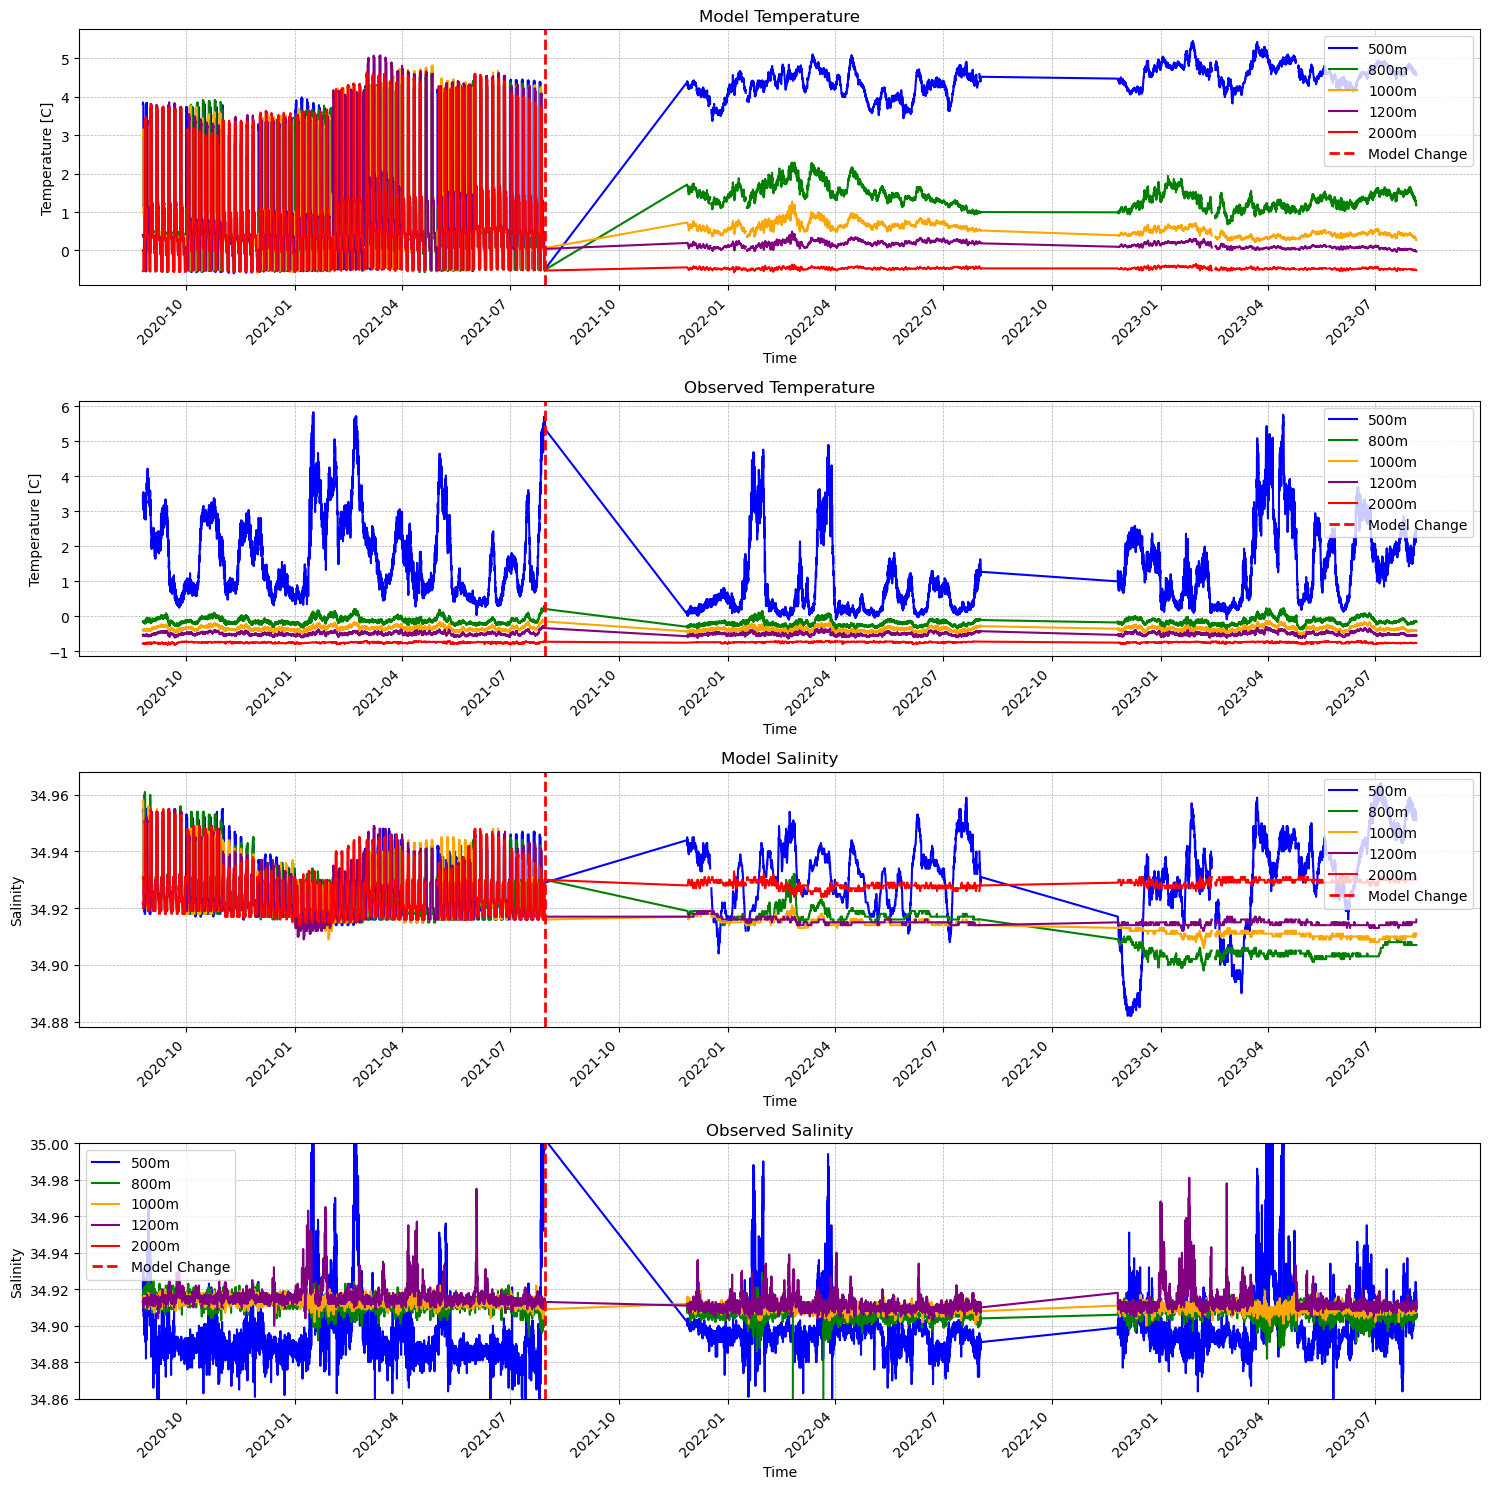

In [10]:
# Opprett plottet
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 15))

# Definer enkle farger
colors = ['blue', 'green', 'orange', 'purple', 'red']

# Temperatur modell
axs[0].plot(time_data, data_500m["TEMP_MOD"], label="500m", color=colors[0])
axs[0].plot(time_data, data_800m["TEMP_MOD"], label="800m", color=colors[1])
axs[0].plot(time_data, data_1000m["TEMP_MOD"], label="1000m", color=colors[2])
axs[0].plot(time_data, data_1200m["TEMP_MOD"], label="1200m", color=colors[3])
axs[0].plot(time_data, data_2000m["TEMP_MOD"], label="2000m", color=colors[4])
axs[0].axvline(x=time_data.iloc[8139], color='red', linewidth=2, linestyle='--', label='Model Change')
axs[0].set_title("Model Temperature")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Temperature [C]")
axs[0].legend()
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Temperatur observasjoner
axs[1].plot(time_data, data_500m["TEMP_FILTER"], label="500m", color=colors[0])
axs[1].plot(time_data, data_800m["TEMP_FILTER"], label="800m", color=colors[1])
axs[1].plot(time_data, data_1000m["TEMP_FILTER"], label="1000m", color=colors[2])
axs[1].plot(time_data, data_1200m["TEMP_FILTER"], label="1200m", color=colors[3])
axs[1].plot(time_data, data_2000m["TEMP_FILTER"], label="2000m", color=colors[4])
axs[1].axvline(x=time_data.iloc[8139], color='red', linewidth=2, linestyle='--', label='Model Change')
axs[1].set_title("Observed Temperature")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Temperature [C]")
axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Salinitet modell
axs[2].plot(time_data, data_500m["SALT_MOD"], label="500m", color=colors[0])
axs[2].plot(time_data, data_800m["SALT_MOD"], label="800m", color=colors[1])
axs[2].plot(time_data, data_1000m["SALT_MOD"], label="1000m", color=colors[2])
axs[2].plot(time_data, data_1200m["SALT_MOD"], label="1200m", color=colors[3])
axs[2].plot(time_data, data_2000m["SALT_MOD"], label="2000m", color=colors[4])
axs[2].axvline(x=time_data.iloc[8139], color='red', linewidth=2, linestyle='--', label='Model Change')
axs[2].set_title("Model Salinity")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Salinity")
axs[2].legend()
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

# Salinitet observasjoner
axs[3].plot(time_data, data_500m["PSAL_FILTER"], label="500m", color=colors[0])
axs[3].plot(time_data, data_800m["PSAL_FILTER"], label="800m", color=colors[1])
axs[3].plot(time_data, data_1000m["PSAL_FILTER"], label="1000m", color=colors[2])
axs[3].plot(time_data, data_1200m["PSAL_FILTER"], label="1200m", color=colors[3])
axs[3].plot(time_data, data_2000m["PSAL_FILTER"], label="2000m", color=colors[4])
axs[3].axvline(x=time_data.iloc[8139], color='red', linewidth=2, linestyle='--', label='Model Change')
axs[3].set_title("Observed Salinity")
axs[3].set_xlabel("Time")
axs[3].set_ylabel("Salinity")
axs[3].set_ylim(34.86, 35)
axs[3].legend()
axs[3].grid(True, which='both', linestyle='--', linewidth=0.5)

# Formater x-aksen til å vise datoer kronologisk og med et bestemt intervall
for ax in axs:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Viser hver tredje måned
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatterer datoene som ÅÅÅÅ-MM
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")  # Roter datoene for bedre lesbarhet

# Juster layout
plt.tight_layout()

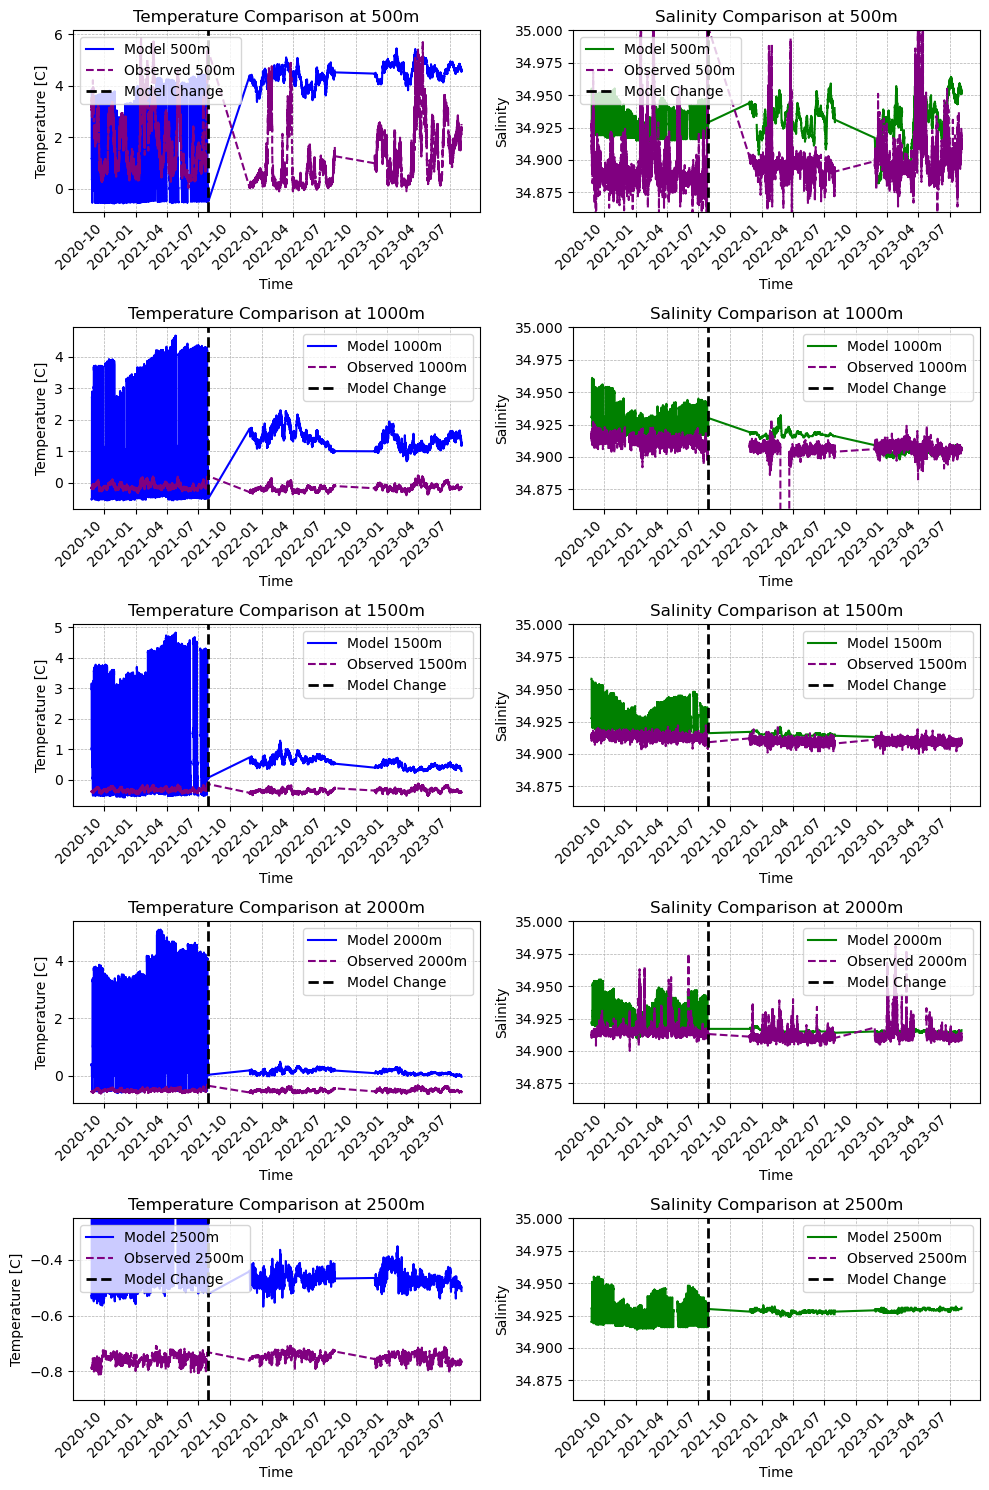

In [32]:
# Opprett plottet
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 15))

# Definer farger
model_color_temp    = 'blue'
obs_color_temp      = 'red'
model_color_sal     = 'green'
obs_color_sal       = 'purple'

# DataFrame liste for enklere iterasjon
data_frames = [data_500m, data_800m, data_1000m, data_1200m, data_2000m]

# Plott hver dybde for temperatur og salinitet
for i, data in enumerate(data_frames):
    # Temperatur
    axs[i, 0].plot(time_data, data["TEMP_MOD"], label=f"Model {i*500+500}m", color=model_color_temp)
    axs[i, 0].plot(time_data, data["TEMP_FILTER"], label=f"Observed {i*500+500}m", linestyle='--', color=obs_color_sal)
    
    axs[i, 0].axvline(x=time_data.iloc[8139], color='black', linewidth=2, linestyle='--', label='Model Change')
    axs[i, 0].set_title(f"Temperature Comparison at {i*500+500}m")
    axs[i, 0].set_xlabel("Time")
    axs[i, 0].set_ylabel("Temperature [C]")
    axs[i, 0].legend()
    axs[i, 0].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Salinitet
    axs[i, 1].plot(time_data, data["SALT_MOD"], label=f"Model {i*500+500}m", color=model_color_sal)
    axs[i, 1].plot(time_data, data["PSAL_FILTER"], label=f"Observed {i*500+500}m", linestyle='--', color=obs_color_sal)
    
    axs[i, 1].axvline(x=time_data.iloc[8139], color='black', linewidth=2, linestyle='--', label='Model Change')
    axs[i, 1].set_title(f"Salinity Comparison at {i*500+500}m")
    axs[i, 1].set_xlabel("Time")
    axs[i, 1].set_ylabel("Salinity")
    axs[i, 1].legend()
    axs[i, 1].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[i, 1].set_ylim(34.86, 35)

# Formater x-aksen til å vise datoer kronologisk og med et bestemt intervall
for ax in axs.flat:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Viser hver tredje måned
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formatterer datoene som ÅÅÅÅ-MM
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")  # Roter datoene for bedre lesbarhet

axs[-1,-2].set_ylim(np.min(data["TEMP_FILTER"].loc[8140::])-0.1, np.max(data["TEMP_MOD"].loc[8140::])+0.1)
axs[1, 3 ].set_ylim(np.min(data["TEMP_FILTER"].loc[8140::])-0.1, np.max(data["TEMP_MOD"].loc[8140::])+0.1)
# Juster layout
plt.tight_layout()


In [12]:
data_500m.head(4)

,DEPTH,TIME,TEMP,TEMP_QC,PSAL,PSAL_QC,LON,LAT,X,Y,DAY,year_month,TEMP_MOD,SALT_MOD,PSAL_FILTER,TEMP_FILTER
0,500.0,2020-08-25 12:00:00,3.439,1.0,34.928,1.0,2.203,65.829,400,333,2020-08-25,2020-08,3.811,34.954,34.928,3.439
1,500.0,2020-08-25 13:00:00,3.246,1.0,34.923,1.0,2.203,65.829,400,333,2020-08-25,2020-08,3.832,34.955,34.923,3.246
2,500.0,2020-08-25 14:00:00,3.310,1.0,34.927,1.0,2.203,65.829,400,333,2020-08-25,2020-08,3.849,34.955,34.927,3.310
3,500.0,2020-08-25 15:00:00,3.200,1.0,34.920,1.0,2.203,65.829,400,333,2020-08-25,2020-08,3.850,34.955,34.920,3.200


In [24]:
# Finner forskjellen i temp data mellom observasjoner og modellen før og etter endring i model
# Temp 500m
diff_500_temp_before =  data_500m["TEMP_FILTER"].loc[0:8139]-data_500m["TEMP_MOD"].loc[0:8139]
diff_500_temp_after =   data_500m["TEMP_FILTER"].loc[8140::]-data_500m["TEMP_MOD"].loc[8140::]

# Temp 800m
diff_800_temp_before =  data_800m["TEMP_FILTER"].loc[0:8139]-data_800m["TEMP_MOD"].loc[0:8139]
diff_800_temp_after =   data_800m["TEMP_FILTER"].loc[8140::]-data_800m["TEMP_MOD"].loc[8140::]

# Temp 800m
diff_2000_temp_before =  data_2000m["TEMP_FILTER"].loc[0:8139]-data_2000m["TEMP_MOD"].loc[0:8139]
diff_2000_temp_after =   data_2000m["TEMP_FILTER"].loc[8140::]-data_2000m["TEMP_MOD"].loc[8140::]

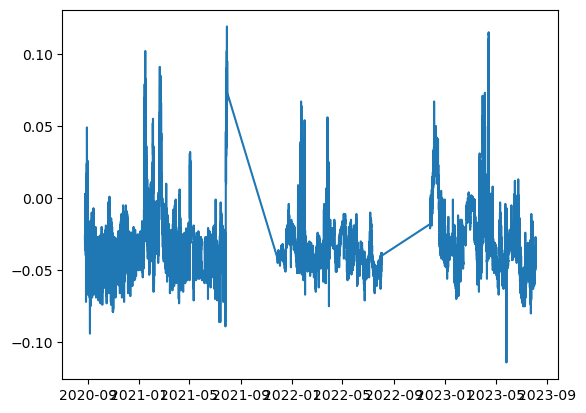

In [14]:
diff_500_sal =  data_500m["PSAL_FILTER"]- data_500m["SALT_MOD"]
plt.plot(time_data, diff_500_sal)

In [25]:
rmse_500 = np.sqrt(np.mean(diff_500_temp_before)**2)
rmse_800 = np.sqrt(np.mean(diff_800_temp_before)**2)
rmse_2000 = np.sqrt(np.mean(diff_2000_temp_before)**2)
rmse_2000_after = np.sqrt(np.mean(diff_2000_temp_after)**2)
print(f'Før for 500m:{rmse_500}')
print(f'Før for 800m:{rmse_800} ')
print(f'Før endirng 2000m: {rmse_2000}')
print(f'Etter endirng 2000m: {rmse_2000_after}')


Før for 500m:0.7633033419023136
Før for 800m:1.1077866093366093 
Før endirng 2000m: 1.701682911392405
Etter endirng 2000m: 0.28243675519237316


In [23]:
rmse_500_after= np.sqrt(np.mean(diff_500_temp_after)**2)
rmse_800_after= np.sqrt(np.mean(diff_800_temp_after)**2)

print(f'Før for 500m:{rmse_500_after}')
print(f'Før for 800m:{rmse_800_after} ')

Før for 500m:3.278912325502213
Før for 800m:1.5629473101804563 
